# The R Programming Language

**Ray Lopez, Ph.D.**

*Sr. Data Scientist, IBM Corporation*

*Lecturer, Texas A&M University San Antonio*


# Note about this presentation

* This presentation was created as a *Jupyter notebook*
* Jupyter notebooks are used to organize and run code in R, Python, etc.
* To view and use Jupyter notebooks you need Python and all the Python Jupyter libraries



# What is R?

* R is a programming language that was invented in 1993
* Evolved to a very powerful set of capabilities
* Used for
    - Data handling and storage
    - Data analytics and statistical analyses
    - Calculations on arrays and matrices
    - Powerful graphing capabilities
    


## Pros
* Free!
* Massive amount of online help and tutorials
* Large community of users
* Very flexible and powerful
* Looks very good on your resume

## Cons
* Steep learning curve
* Use outside of academia is declining in favor of Python

# Where can I get R?

* R is free and open source!
* [r-project.org](http://r-project.org)
* R is available for Windows, Mac, and Linux platforms
* From r-project.org, you can access different CRAN servers across the world (Comprehensive R Archive Network)
* This only gets you the R interpreter, which is FUGLY!


# Use R Studio to make life easier

* [rstudio.com](http://rstudio.com)
* Organizes things into different panes

# Walk through a simple analysis

* 2x2 ANOVA
* IVs
    - Attractiveness of defendant in a trial (attractive and unattractive)
    - Smiling (smiling v. not smiling)
* DV: Perceived guilt of defendant
* Hypothesis: Attractive persons who smile are perceived as being less guilty than unattractive persons or persons who do not smile.  


# Workflow

* Get data
* Import data into R
* Get descriptive stats
* Run ANOVA
* Look at results

# Get data

* Most researchers use spreadsheets to initially organize data
* Data are entered into a spreadsheet and coded per level of each IV
* Example ...
* After data are entered, export spreadsheet as a CSV file (comma separated values)
* Example ...

In [47]:
# R code to import CSV file into an R data frame using the read.csv() function
# Data Frame:  A matrix with names above each column

my_anova_data = read.csv("./2waydata.csv")
my_anova_data

FACTOR_A FACTOR_S GUILT
1  A        S        10   
2  A        S        15   
3  A        S        21   
4  A        S        19   
5  A        S        23   
6  A        S        12   
7  A        S        10   
8  A        S         9   
9  A        N        23   
10 A        N        21   
11 A        N        19   
12 A        N        34   
13 A        N         8   
14 A        N        23   
15 A        N        25   
16 A        N        22   
17 U        S        34   
18 U        S        33   
19 U        S        39   
20 U        S        29   
21 U        S        42   
22 U        S        37   
23 U        S        33   
24 U        S        39   
25 U        N        76   
26 U        N        67   
27 U        N        59   
28 U        N        78   
29 U        N        90   
30 U        N        63   
31 U        N        78   
32 U        N        77

In [48]:
# To take a quick look at the STRUCTURE of the data in the data frame we can use the str() function

str(my_anova_data)

'data.frame':	32 obs. of  3 variables:
 $ FACTOR_A: Factor w/ 2 levels "A","U": 1 1 1 1 1 1 1 1 1 1 ...
 $ FACTOR_S: Factor w/ 2 levels "N","S": 2 2 2 2 2 2 2 2 1 1 ...
 $ GUILT   : int  10 15 21 19 23 12 10 9 23 21 ...


In [49]:
# Calculate the cell means of each of the two independent variables Attractiveness (FACTOR_A) and
# Smiling (FACTOR_S)

require("dplyr")
group_by(my_anova_data, FACTOR_A, FACTOR_S) %>%
  dplyr::summarise(
    count = n(),
    mean = mean(GUILT, na.rm = TRUE),
    sd = sd(GUILT, na.rm = TRUE)
  )

FACTOR_A FACTOR_S count mean   sd      
1 A        N        8     21.875 7.180082
2 A        S        8     14.875 5.488625
3 U        N        8     73.500 9.957051
4 U        S        8     35.750 4.234214

In [50]:
# Calculate the MARGINAL cell means of each of the two independent variables Attractiveness (FACTOR_A) and
# Smiling (FACTOR_S)

library("plyr") # Use the plyr package
factor_a_means<-ddply(my_anova_data, .(FACTOR_A), summarize, mean=mean(GUILT))
print(factor_a_means)
factor_s_means<-ddply(my_anova_data, .(FACTOR_S), summarize, mean=mean(GUILT))
print(factor_s_means)

  FACTOR_A   mean
1        A 18.375
2        U 54.625
  FACTOR_S    mean
1        N 47.6875
2        S 25.3125


In [51]:
# Create a cute little table of n for each cell

table(my_anova_data$FACTOR_A, my_anova_data$FACTOR_S)

   
    N S
  A 8 8
  U 8 8

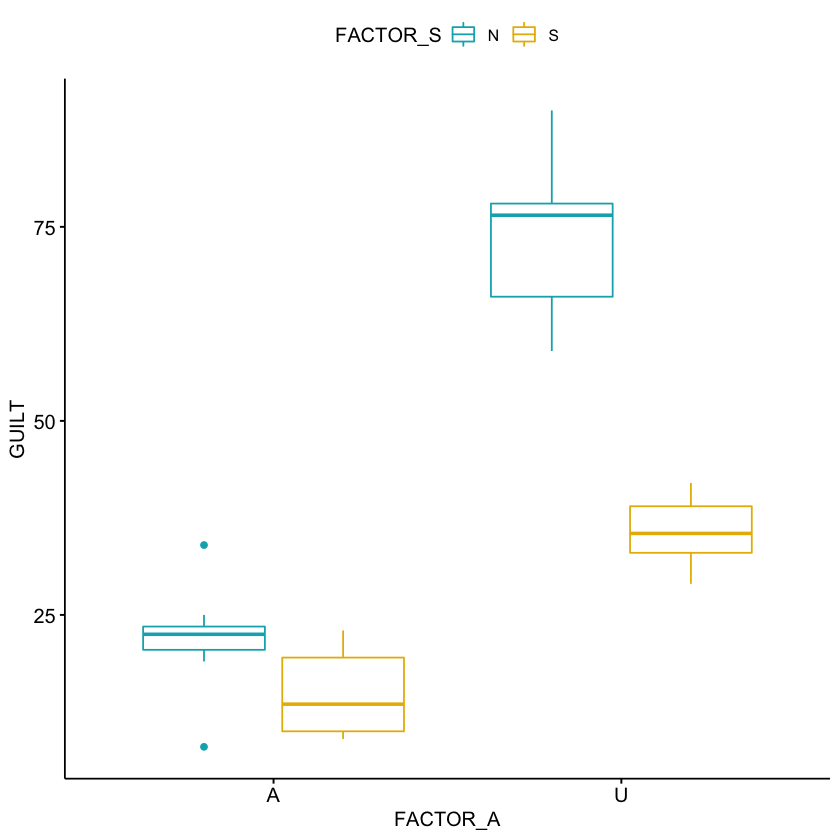

In [52]:
# Create a box plot with multiple groups
# Plot GUILT by FACTOR_A and color box plot by FACTOR_S

library("ggpubr")
ggboxplot(my_anova_data, x = "FACTOR_A", y = "GUILT", color = "FACTOR_S", 
          palette = c("#00AFBB", "#E7B800"))

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.


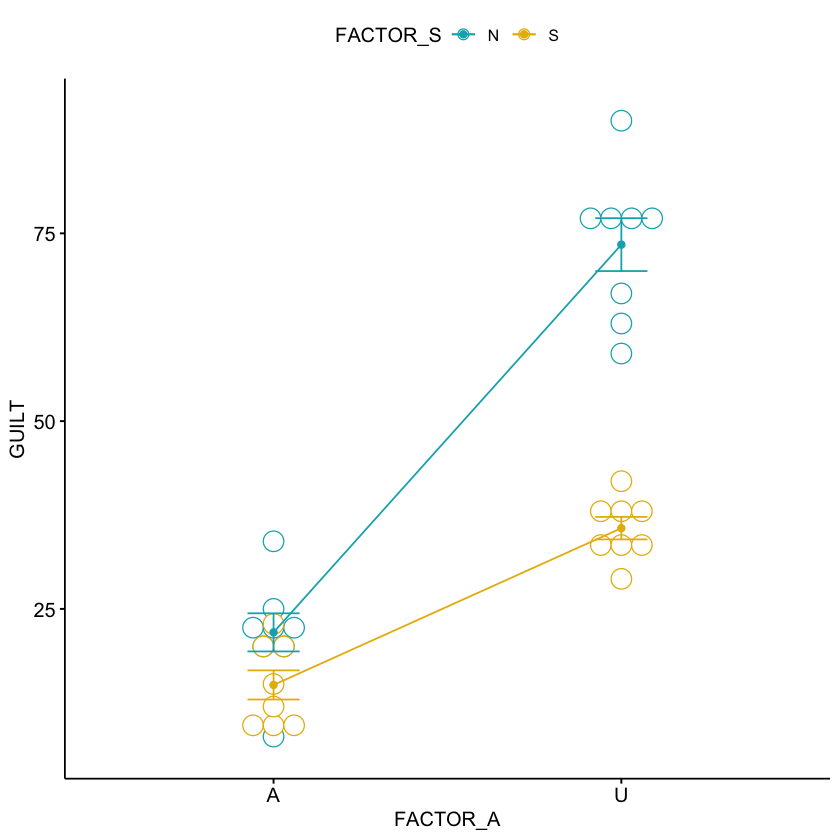

In [53]:
# Create a ine plot with multiple groups
# Plot GUILT by FACTOR_A and color box plot by FACTOR_S
# Add error bars: mean_se
# (other values include: mean_sd, mean_ci, median_iqr, ....)

ggline(my_anova_data, x = "FACTOR_A", y = "GUILT", color = "FACTOR_S", 
       add = c("mean_se", "dotplot"), 
       palette = c("#00AFBB", "#E7B800"))

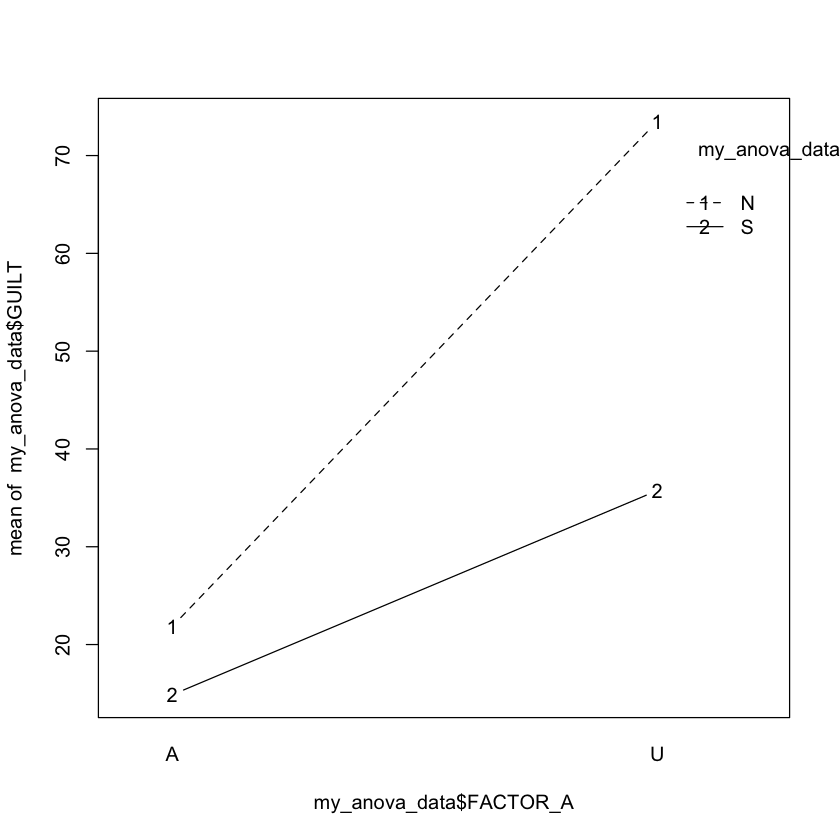

In [54]:
# Simpler plot with simpler code using the interaction.plot() function

interaction.plot(x.factor=my_anova_data$FACTOR_A, trace.factor=my_anova_data$FACTOR_S, 
                 response=my_anova_data$GUILT, type='b')  

In [55]:
# Do the ANOVA using the aov() function!

my_anova <- aov(GUILT ~ FACTOR_A + FACTOR_S + FACTOR_A:FACTOR_S, data = my_anova_data)
summary(my_anova)

                  Df Sum Sq Mean Sq F value   Pr(>F)    
FACTOR_A           1  10513   10513  211.57 1.40e-14 ***
FACTOR_S           1   4005    4005   80.61 9.83e-10 ***
FACTOR_A:FACTOR_S  1   1891    1891   38.06 1.16e-06 ***
Residuals         28   1391      50                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [56]:
# Just for fun let's do some Tukey Honest Significant Differences (HSD) tests.

TukeyHSD(my_anova, which = "FACTOR_A")
TukeyHSD(my_anova, which = "FACTOR_S")

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = GUILT ~ FACTOR_A + FACTOR_S + FACTOR_A:FACTOR_S, data = my_anova_data)

$FACTOR_A
     diff      lwr      upr p adj
U-A 36.25 31.14501 41.35499     0


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = GUILT ~ FACTOR_A + FACTOR_S + FACTOR_A:FACTOR_S, data = my_anova_data)

$FACTOR_S
       diff       lwr       upr p adj
S-N -22.375 -27.47999 -17.27001     0


# Resources

* This notebook: [http://ratthing.com/u/3b](http://ratthing.com/u/3b)
* R homepage: [r-project.org](http://r-project.org)
* R Studio: [rstudio.com](http://rstudio.com)
* Beginner's Guide to R: [ratthing.com/u/3a](http://ratthing.com/u/3a)
* Anaconda: [anaconda.com](https://www.anaconda.com/)
* YouTube R Programming Tutorial: [https://www.youtube.com/watch?v=_V8eKsto3Ug](https://www.youtube.com/watch?v=_V8eKsto3Ug)
* Coursera R course: [https://www.coursera.org/learn/r-programming](https://www.coursera.org/learn/r-programming)